In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [6]:
df = pd.read_excel("C:/Users/Janhavi/Downloads/Heart Disease data.xlsx")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

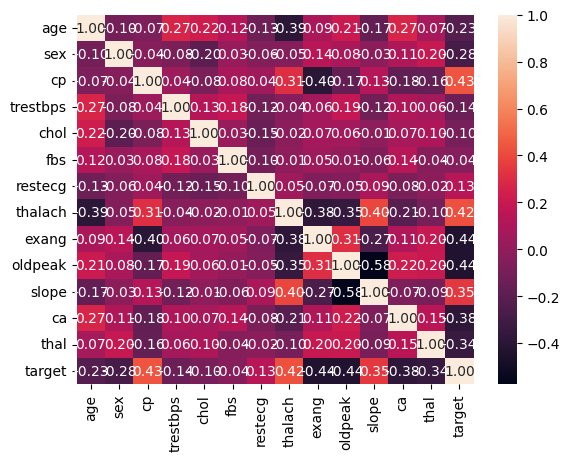

In [12]:
ax = sns.heatmap(df.corr(),annot = True,fmt=".2f")

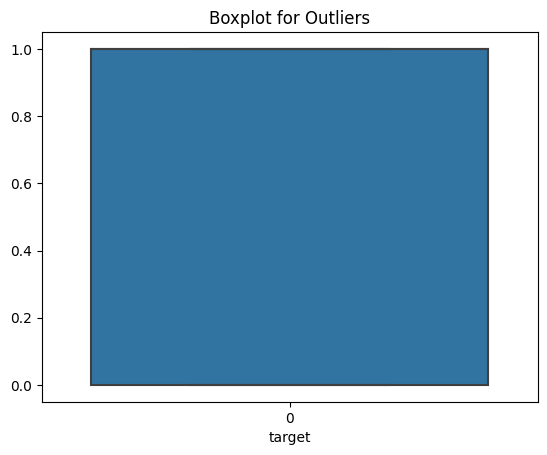

In [13]:
sns.boxplot(data=df['target'])
plt.xlabel('target')
plt.title('Boxplot for Outliers')
plt.show()

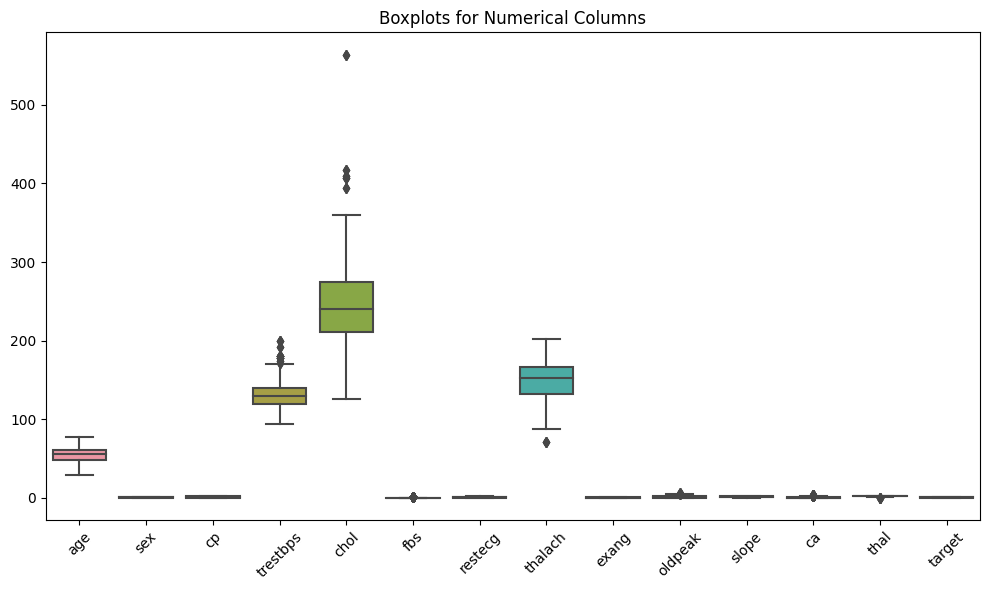

In [14]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=df)
plt.title('Boxplots for Numerical Columns')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

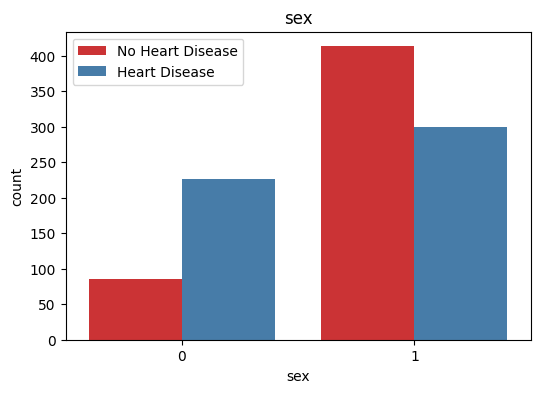

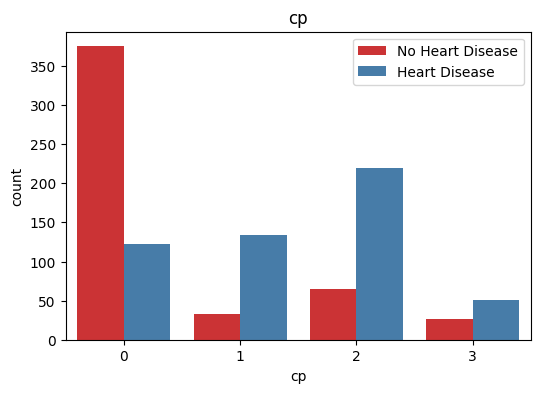

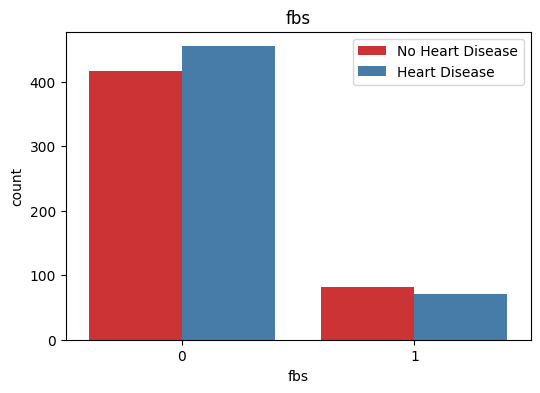

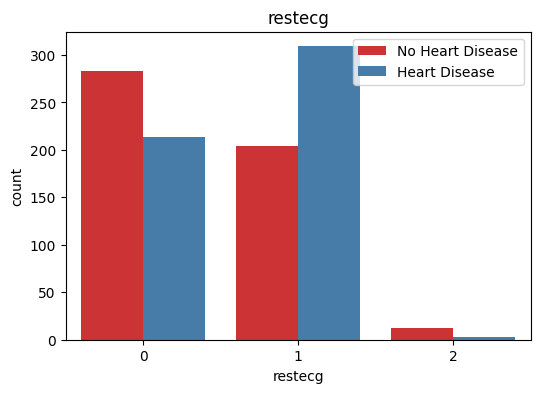

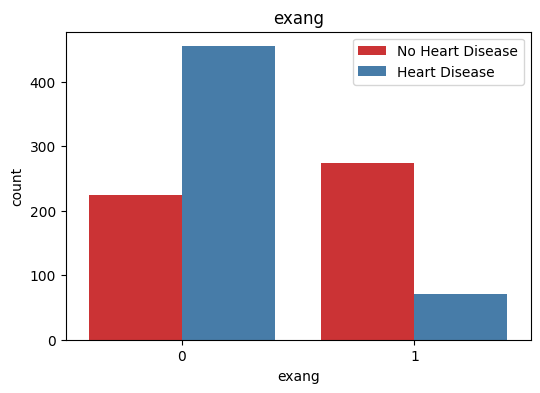

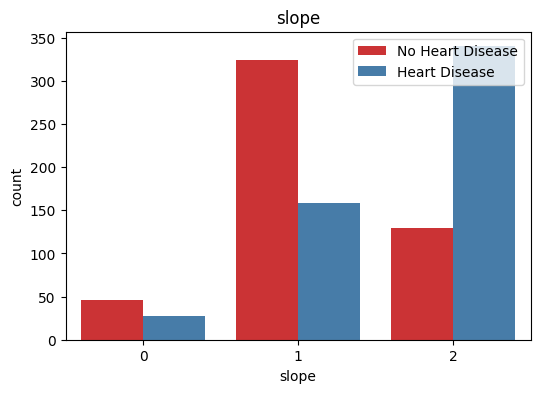

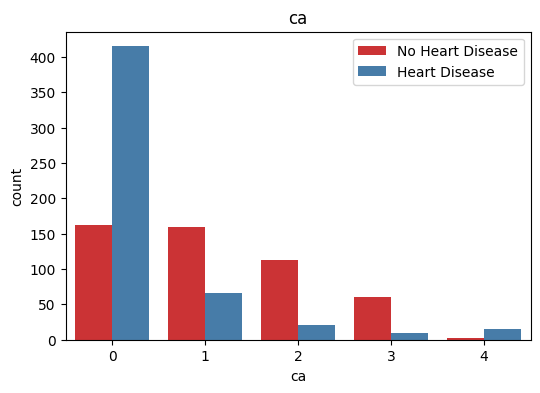

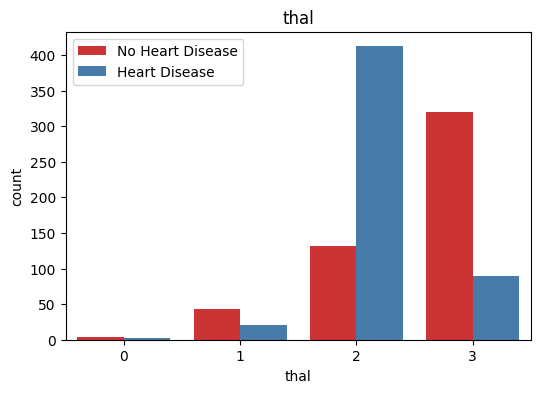

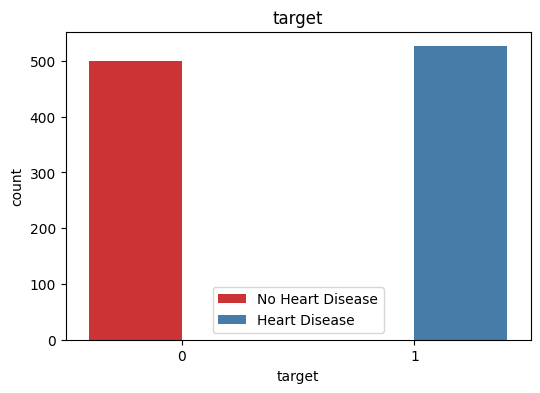

In [15]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='target', palette='Set1')
    plt.title(col)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.show()

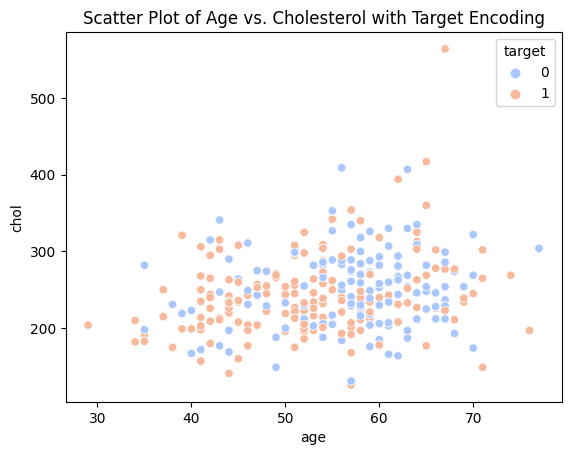

In [16]:
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='coolwarm')
plt.title("Scatter Plot of Age vs. Cholesterol with Target Encoding")
plt.show()


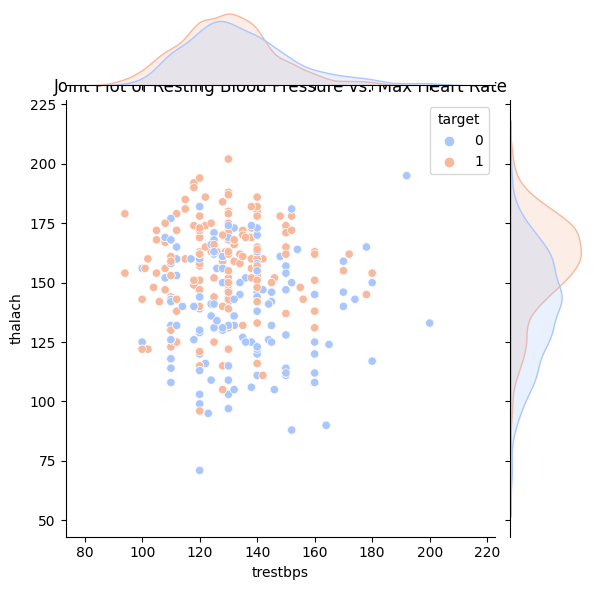

In [17]:
sns.jointplot(data=df, x='trestbps', y='thalach', hue='target', palette='coolwarm')
plt.title("Joint Plot of Resting Blood Pressure vs. Max Heart Rate")
plt.show()

In [18]:
avg_age = df['age'].mean()
max_heart_rate = df['thalach'].max()
chol_threshold = 240
high_chol_patients = df[df['chol'] > chol_threshold]
percentage_high_chol = (len(high_chol_patients) / len(df)) * 100


In [19]:
print(f"Average Age: {avg_age:.2f}")
print(f"Max Heart Rate: {max_heart_rate}")
print(f"Percentage of Patients with High Cholesterol: {percentage_high_chol:.2f}%")


Average Age: 54.43
Max Heart Rate: 202
Percentage of Patients with High Cholesterol: 49.07%


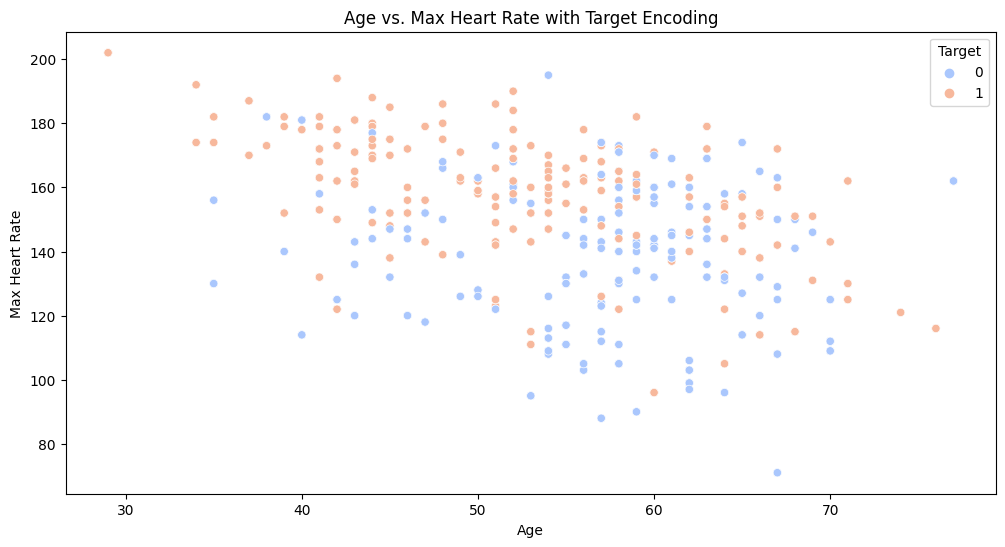

In [20]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='coolwarm')
plt.title("Age vs. Max Heart Rate with Target Encoding")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(title="Target", loc='upper right')
plt.show()


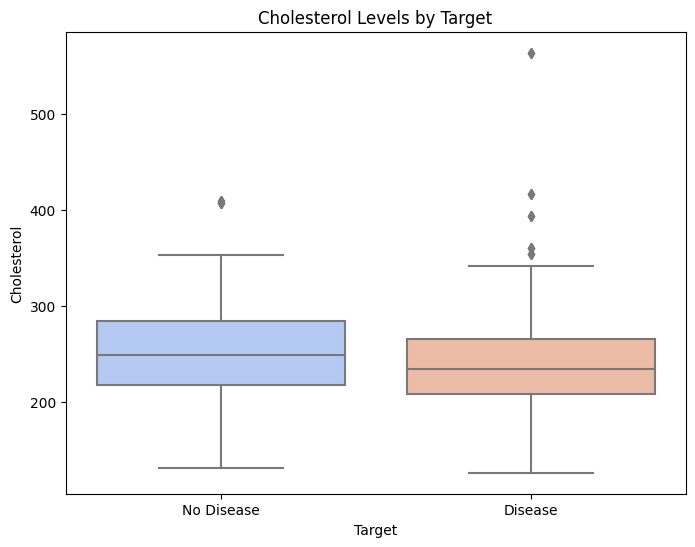

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='chol', palette='coolwarm')
plt.title("Cholesterol Levels by Target")
plt.xlabel("Target")
plt.ylabel("Cholesterol")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()